### Participants:
- Trần Dương Tấn Toàn - 2011156105
- Nguyễn Hoàng Khang - 2015535230
- Nguyễn Quang Hưng - 2012256010


### List of content

1. Introduction
2. Data Preparing
3. Briefly describe data using descriptive statistics and plots
4. Building Models
- Standard econometric method: Base Rate Model
- Decision Tree Model
- Random Forest Model
- ROC curve for 3 models
5. Comparision
6. Conclusion
7. Future Work
7. References

# Introduction

In today's highly competitive job market, recent graduates encounter formidable obstacles in their quest for employment, particularly when they lack any substantial prior professional experience. To navigate this challenging landscape effectively, it is imperative to gain a comprehensive understanding of the diverse job opportunities available across various industries. This project endeavors to create a machine learning model that can offer an insightful analysis of the employment panorama for recent graduates and individuals new to the workforce. This analysis is rooted in data obtained through web scraping techniques, which extract and scrutinize job-related information from "jobsgo.vn," a prominent recruitment website.

The core objective of this project is to focus on the assessment and prediction of job evaluation values. This assessment is based on a wide array of features related to job positions, companies, salary and job types. The ultimate aim is to construct and compare three predictive models: a Base Rate Model, Decision Tree and a Random Forest Model, all aimed at forecasting job evaluation values. The project encompasses a thorough journey through data exploration, preprocessing, visualization, as well as model development and evaluation.

By addressing these critical questions and exploring these facets, our study seeks to equip recent graduates with a valuable tool that can aid them in determining the quality of a job opportunity, thereby facilitating informed career decisions.

# Data preparing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import the Data
Data = pd.read_csv('C:/Users/A515-56/Downloads/Classroom/AI/Data outcome.csv')
Data

,Evaluation value,Job Field,Job Name,Company,Type,Average Salary
0,1,IT,Nhân Viên Kinh Doanh Website (Không Đi Thị Trư...,Công Ty TNHH Công Nghệ Sota Group,Full-time,15.5
1,1,IT,Nhân Viên Kinh Doanh Phần Cứng Server/ Máy Tín...,Công Ty Cổ Phần Công Nghệ Máy Chủ Mạng,Full-time,13.5
2,1,IT,Nhân Viên Kinh Doanh Website (Không Đi Thị Trư...,JobsGO Recruit,Full-time,15.5
3,0,IT,Nhân Viên Trực Tồng đài VTV Cab - Ca xoay,BELLSYSTEM24 VIỆT NAM,Full-time,7.5
4,1,IT,Nhân Viên Tư Vấn Dịch Vụ Viettel - Giờ Hành Chính,BELLSYSTEM24 VIỆT NAM,Full-time,14.5
...,...,...,...,...,...,...
1176,0,Restaurant,Nhân Viên Trực Tổng đài VTV Cab - Ca xoay,BELLSYSTEM24 VIỆT NAM,Full-time,7.5
1177,0,Restaurant,Nhân Viên Trực Tổng Đài Truyền Hình VTV Cab,BELLSYSTEM24 VIỆT NAM,Full-time,7.5
1178,1,Restaurant,Nhân Viên Phụ Bếp Âu (Ca Xoay),JobsGO Recruit,Full-time,9.5
1179,0,Restaurant,Phụ Bếp Nhật - Không Yêu Cầu Kinh Nghiệm,JobsGO Recruit,Part-time,0.0


In [2]:
# Check the data type before drawing graph and running models
Data.dtypes

Evaluation value      int64
Job Field            object
Job Name             object
Company              object
Type                 object
Average Salary      float64
dtype: object

In [3]:
# Rescale the "Average Salary" to fit with the binary dataset
col_to_scale = ['Average Salary']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Data[col_to_scale] = scaler.fit_transform(Data[col_to_scale])
Data

,Evaluation value,Job Field,Job Name,Company,Type,Average Salary
0,1,IT,Nhân Viên Kinh Doanh Website (Không Đi Thị Trư...,Công Ty TNHH Công Nghệ Sota Group,Full-time,0.213793
1,1,IT,Nhân Viên Kinh Doanh Phần Cứng Server/ Máy Tín...,Công Ty Cổ Phần Công Nghệ Máy Chủ Mạng,Full-time,0.186207
2,1,IT,Nhân Viên Kinh Doanh Website (Không Đi Thị Trư...,JobsGO Recruit,Full-time,0.213793
3,0,IT,Nhân Viên Trực Tồng đài VTV Cab - Ca xoay,BELLSYSTEM24 VIỆT NAM,Full-time,0.103448
4,1,IT,Nhân Viên Tư Vấn Dịch Vụ Viettel - Giờ Hành Chính,BELLSYSTEM24 VIỆT NAM,Full-time,0.200000
...,...,...,...,...,...,...
1176,0,Restaurant,Nhân Viên Trực Tổng đài VTV Cab - Ca xoay,BELLSYSTEM24 VIỆT NAM,Full-time,0.103448
1177,0,Restaurant,Nhân Viên Trực Tổng Đài Truyền Hình VTV Cab,BELLSYSTEM24 VIỆT NAM,Full-time,0.103448
1178,1,Restaurant,Nhân Viên Phụ Bếp Âu (Ca Xoay),JobsGO Recruit,Full-time,0.131034
1179,0,Restaurant,Phụ Bếp Nhật - Không Yêu Cầu Kinh Nghiệm,JobsGO Recruit,Part-time,0.000000


# Briefly describe data using descriptive statistics and plots

In [4]:
# Calculate descriptive statistics for all numerical columns
descriptive_stats = Data.describe()

# Display the descriptive statistics
print(descriptive_stats)

       Evaluation value  Average Salary
count       1181.000000     1181.000000
mean           0.580017        0.111221
std            0.493765        0.137505
min            0.000000        0.000000
25%            0.000000        0.000000
50%            1.000000        0.089655
75%            1.000000        0.206897
max            1.000000        1.000000


The descriptive statistics summarize the 'Evaluation value' and 'Average Salary' columns in the dataset:
- Count: There are 1181 values in both columns.
- Mean: The average 'Evaluation value' is around 0.58 and the average 'Average Salary' is around 0.11.
- Std (Standard Deviation): The standard deviation is approximately 0.49 for 'Evaluation value' and 0.14 for 'Average Salary', indicating moderate variation around the mean.
- Min (Minimum): The minimum value in both columns is 0.
- 25% (First Quartile): 25% of people have a 'Evaluation value' and 'Average Salary' of 0.
- 50% (Median): The median 'Evaluation value' is 1, meaning half of people have an evaluation value of 1 or less. The median 'Average Salary' is approximately 0.09, meaning half of people have an average salary of 0.09 or less.
- 75% (Third Quartile): 75% of people have an 'Evaluation value' of 1 and an 'Average Salary' of approximately 0.21 or less.
- Max (Maximum): The maximum 'Evaluation value' and 'Average Salary' in the dataset are both 1.

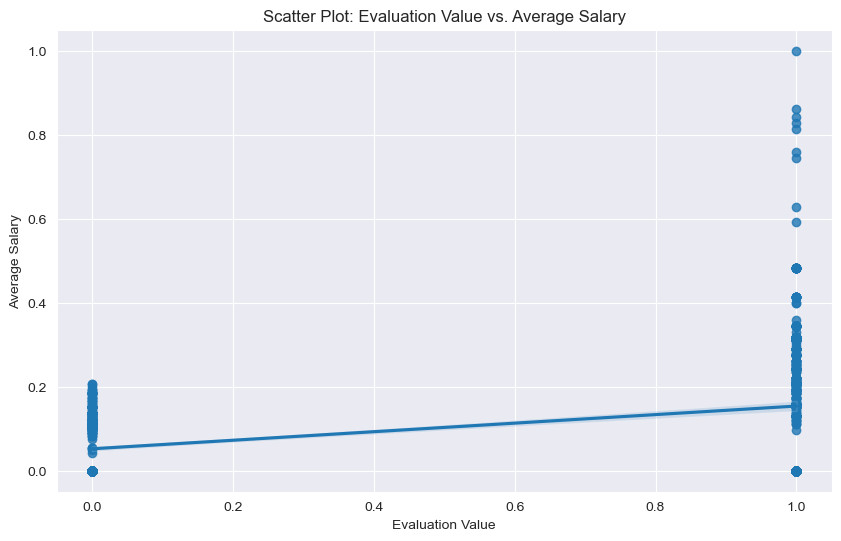

In [5]:
#Scatter Plot: Evaluation Value vs Average
plt.figure(figsize=(10, 6))
sns.regplot(data=Data, x='Evaluation value', y='Average Salary')
plt.title("Scatter Plot: Evaluation Value vs. Average Salary")
plt.xlabel("Evaluation Value")
plt.ylabel("Average Salary")
plt.show()

The impact of salary on candidates' job choices is evident. According to the graph, when the average salary is scaled from 0 to 1, most evaluation values are 1 (high) when salaries higher than 0.5. However, there are still a significant number of candidates considering jobs with average salaries below 0.5. Therefore, it is important to take into account other factors, such as the job field, company or job type.

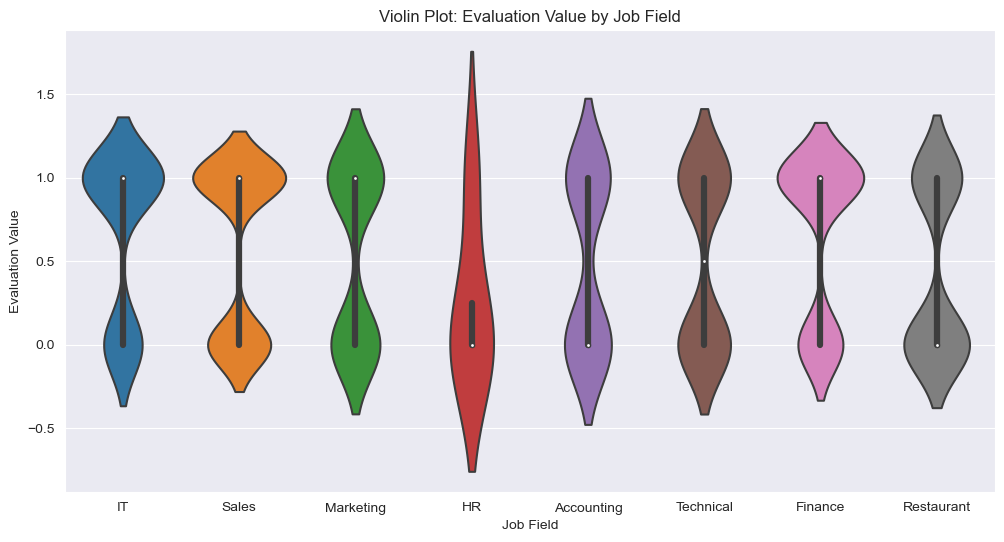

In [6]:
# Violin Plot: Evaluation value by Job Fields
plt.figure(figsize=(12, 6))
sns.violinplot(data=Data, x='Job Field', y='Evaluation value')
plt.title("Violin Plot: Evaluation Value by Job Field")
plt.xlabel("Job Field")
plt.ylabel("Evaluation Value")
plt.xticks(rotation=0)
plt.show()

The industries have some influence on job seekers' choices. Industries like Finance, Sales, and IT have a higher rate of selection and more evenly distributed opportunities compared to industries with relatively lower selection rates, such as HR and restaurants. The distribution of choices within each industry plays a crucial role in determining the quality of a job decision, especially when considering future career directions.

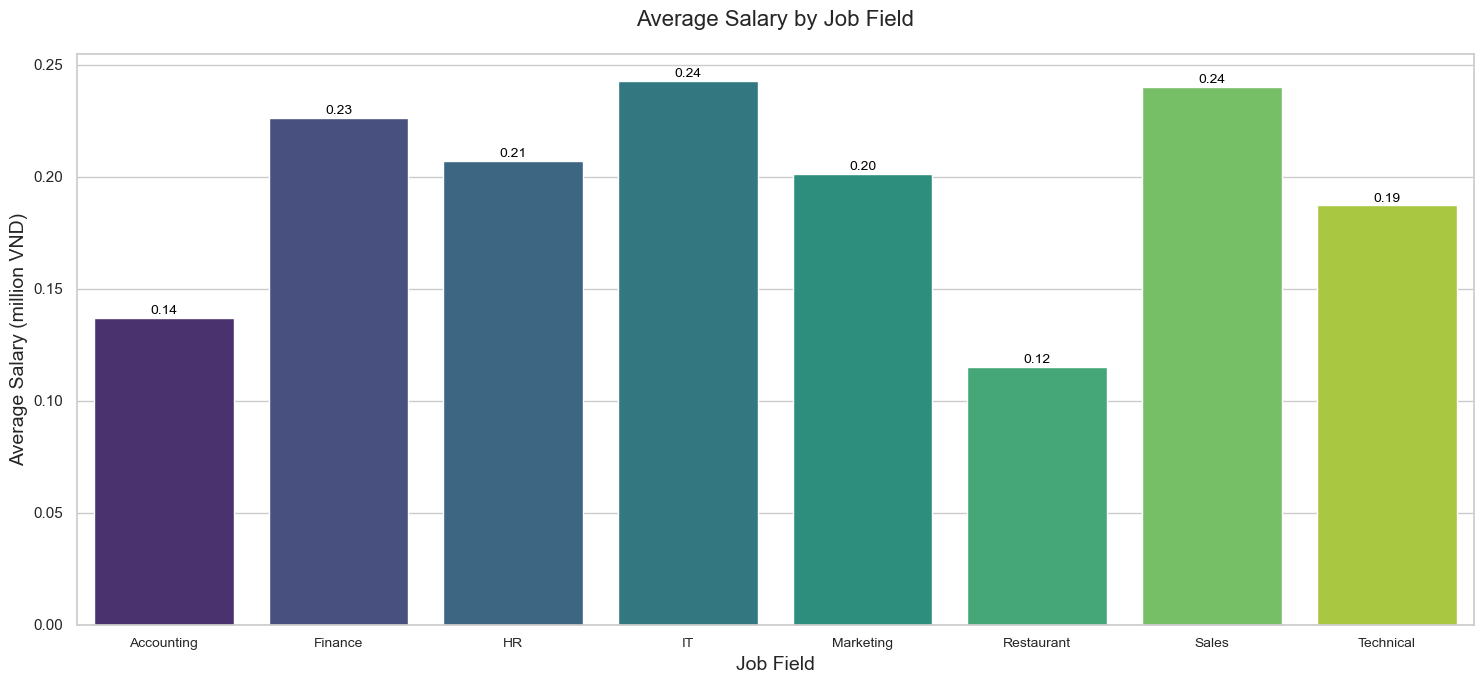

In [7]:
# Average Salary by Job Fields
# Filter rows where Average Salary is not equal to 0
filtered_Data = Data[Data['Average Salary'] != 0]

# Group the filtered data by "Custom Name" and calculate the average salary for each group
average_salary_by_custom_name = filtered_Data.groupby('Job Field')['Average Salary'].mean().reset_index()

# Set seaborn style for better aesthetics
sns.set(style="whitegrid")

# Create a bar chart with customized names as x-axis labels and centered title
plt.figure(figsize=(15, 7))
ax = sns.barplot(x='Job Field', y='Average Salary', data=average_salary_by_custom_name, palette="viridis")
plt.xlabel('Job Field', fontsize=14)
plt.ylabel('Average Salary (million VND)', fontsize=14)
plt.title('Average Salary by Job Field', fontsize=16, pad=20)  # Adjust the 'pad' for title position
plt.xticks(rotation=0, ha='center', fontsize=10)  # Rotate x-axis labels for better readability

# Add data labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

The chart below displays the average salary for various fields and industries. Evaluating job quality based on salary can yield more accurate results when considering career paths. A high salary in one industry, like Restaurant, may be relatively low in another industry, such as Sales. This is why personal career aspirations should be taken into account.

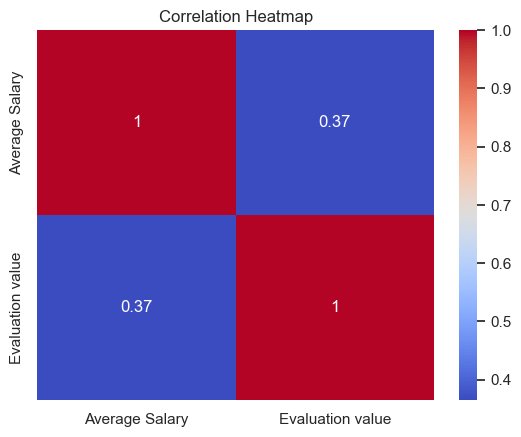

In [8]:
# Heatmap for correlation between numeric columns
numeric_data = Data[['Average Salary', 'Evaluation value']]
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

The chart below illustrates the correlation between average salary and evaluation value. As there are only two values to consider, we can only establish a significant correlation between average salary and evaluation value. It is important to note that factors such as industry, company, and other non-numerical data are not included in the graph. Therefore, the correlation depicted in the graph is only indicative and requires further clarification through the machine learning process.

# BUILDING MODELS

### Create binary values for category variables

In [9]:
# Create dummy variables for the 'department' and 'salary' features, since they are categorical
Job_field = pd.get_dummies(data=Data['Job Field'], drop_first=True, prefix='field')
Company = pd.get_dummies(data=Data['Company'], drop_first=True, prefix='comp')
Job_type = pd.get_dummies(data=Data['Type'], drop_first=True, prefix='type')
Data.drop(['Job Field', 'Company', 'Type'], axis=1, inplace=True)
Data = pd.concat([Data, Job_type, Job_field, Company], axis=1)

Data.drop('Job Name', axis='columns', inplace=True)
Data

,Evaluation value,Average Salary,type_Part-time,field_Finance,field_HR,field_IT,field_Marketing,field_Restaurant,field_Sales,field_Technical,...,comp_Trường Trung Cấp Bách Khoa Sài Gòn,comp_Tổng Công Ty Bảo Việt Nhân Thọ,comp_VI (Vietnam Investments) Group,comp_VPĐD LP Foods Pte. Ltd. Tại TP.HCM ( Singapore ),comp_Van Thiel & CO,comp_Vietsea Joint Stock Company,comp_Văn Phòng Công Chứng Nguyễn Tấn Thành,comp_We Global Việt Nam,comp_Wilmar CLV,comp_Win Suites Saigon
0,1,0.213793,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,0.186207,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,0.213793,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,0.103448,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,0.200000,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,0,0.103448,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1177,0,0.103448,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1178,1,0.131034,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1179,0,0.000000,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


### Split the data into training and testing sets

In [10]:
from sklearn.model_selection import train_test_split

X = Data.drop("Evaluation value", axis='columns') # X include independent variables
Y = Data["Evaluation value"] # Y include dependent variables

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=182)

## Q2: Traditional econometric method 

### BASE RATE MODEL

In [11]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report

base_rate_model = DummyClassifier(strategy='most_frequent') 
base_rate_model.fit(X_train, Y_train)
base_rate_predictions = base_rate_model.predict(X_test)

# Calculate accuracy and print classification report for the base rate model
base_rate_accuracy = accuracy_score(Y_test, base_rate_predictions)

base_rate_cl_rep = classification_report(Y_test, base_rate_predictions)

print("Predictions (first 10):", base_rate_predictions[:10])
print("Base Rate Model Accuracy:", base_rate_accuracy)
print("Base Rate Model Classification Report:\n", base_rate_cl_rep)

Predictions (first 10): [1 1 1 1 1 1 1 1 1 1]
Base Rate Model Accuracy: 0.5189873417721519
Base Rate Model Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       114
           1       0.52      1.00      0.68       123

    accuracy                           0.52       237
   macro avg       0.26      0.50      0.34       237
weighted avg       0.27      0.52      0.35       237


C:\Users\A515-56\.conda\envs\AI\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\A515-56\.conda\envs\AI\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\A515-56\.conda\envs\AI\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Comment on the base rate model

 The Base Rate Model predicts almost all instances as 'High,' leading to a high recall for the 'High' class. However, it has very low precision (meaning it has a high rate of false positives); and also doesn't perform well in identifying the 'Low' classes.
 --> This model serves as a simple baseline but is not suitable for practical use due to its low overall accuracy and precision issues.

### LOGISTIC REGRESSION MODEL

In [12]:
from sklearn.linear_model import LogisticRegression

# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, Y_train)

# Extract beta values (coefficients) from the logistic regression model
beta_values = model.coef_

# Create a DataFrame to associate coefficients with independent variables
beta_df = pd.DataFrame(data=beta_values, columns=X.columns)

# Print the beta values for all classes and independent variables
print(beta_df)

# Assess the model's performance
acc = model.score(X_test, Y_test)
print("Logistic Regression Model Accuracy:", acc)

y_predict = model.predict(X_test)
print("Predictions (first 10):", y_predict[:10])

cl_rep = classification_report(Y_test, y_predict)
print(cl_rep)

   Average Salary  type_Part-time  field_Finance  field_HR  field_IT  \
0        5.796285        0.700178       0.096818 -0.529987  0.631921   

   field_Marketing  field_Restaurant  field_Sales  field_Technical  \
0         0.102949         -0.434943    -0.182317         0.053619   

   comp_AGC Chemicals Vietnam Co., Ltd.  ...  \
0                              0.686289  ...   

   comp_Trường Trung Cấp Bách Khoa Sài Gòn  \
0                                -0.392672   

   comp_Tổng Công Ty Bảo Việt Nhân Thọ  comp_VI (Vietnam Investments) Group  \
0                             0.555405                             0.464557   

   comp_VPĐD LP Foods Pte. Ltd. Tại TP.HCM ( Singapore )  comp_Van Thiel & CO  \
0                                           0.464557                -0.295182   

   comp_Vietsea Joint Stock Company  \
0                          0.464557   

   comp_Văn Phòng Công Chứng Nguyễn Tấn Thành  comp_We Global Việt Nam  \
0                                   -0.374192    

## Q3: Building AI models to analyze the data and give predictions on the test data sets

### Decision Tree Model

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

dtree = DecisionTreeClassifier(min_weight_fraction_leaf=0.005)
dtree.fit(X_train, Y_train)

# Predict and evaluate
y_pred = dtree.predict(X_test)
report = classification_report(Y_test, y_pred)
accuracy = dtree.score(X_test, Y_test)
print("Predictions (first 10):", y_pred[:10])
print("Decision Tree Accuracy:", accuracy)
print(report)

Predictions (first 10): [0 0 0 0 1 1 1 0 1 0]
Decision Tree Accuracy: 0.7932489451476793
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       114
           1       0.79      0.82      0.80       123

    accuracy                           0.79       237
   macro avg       0.79      0.79      0.79       237
weighted avg       0.79      0.79      0.79       237


#### Comment on Decision Tree Model

The Decision Tree model demonstrates significantly better performance compared to the baseline model. It has a higher accuracy and provides balanced precision and recall for both classes, indicating that it performs well in predicting both class 0 and class 1. The F1-scores for both classes are also quite high, suggesting a good balance between precision and recall. This model is a promising choice for the classification task, and its performance is a substantial improvement over the baseline model.

#### Create a Decision Tree file

In [14]:
from sklearn.tree import export_graphviz
import graphviz

class_name = ["Low", "High"]
dot_data = export_graphviz(
    dtree,
    out_file=None, 
    feature_names=X.columns,
    class_names=class_name,
    filled=True,
    rounded=True
)
graph = graphviz.Source(dot_data)

# Save the graph to a file (optional)
graph.render("decision_tree", view = True)

'decision_tree.pdf'

### Random Forest Model

In [15]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=2)
random_forest_model.fit(X_train, Y_train)

# Predict and evaluate Random Forest model
y_predict = random_forest_model.predict(X_test)

cl_rep = classification_report(Y_test, y_predict)

acc = random_forest_model.score(X_test, Y_test)
print("Predictions (first 10):", y_predict[:10])
print("Random Forest Model Accuracy:", acc)
print(cl_rep)

Predictions (first 10): [0 0 0 0 1 1 1 0 0 0]
Random Forest Model Accuracy: 0.8649789029535865
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       114
           1       0.87      0.87      0.87       123

    accuracy                           0.86       237
   macro avg       0.86      0.86      0.86       237
weighted avg       0.86      0.86      0.86       237


#### Comment on the Random Forest Model

Overall, the Random Forest model demonstrates excellent performance. It has a high accuracy and provides balanced precision and recall for both classes. The F1-scores for both classes are also high, indicating a good balance between precision and recall. This model is a strong choice for the classification task and shows a significant improvement over both the baseline model and the Decision Tree model.

# Q4: Compare the models

## Base on Classification Report

In the context of a classification task, the three models—Base Rate Model, Decision Tree Model, and Random Forest Model—each demonstrate unique characteristics and performance levels. To understand their correlation, it's essential to consider various aspects, including first 10 predictions, precision, and recall.

Firstly, examining the first 10 predictions sheds light on the initial outcomes of these models. The Base Rate Model yields a set of predictions, all labeled as 'High.' This approach, while achieving a high recall for the 'High' class, struggles with precision, and subsequently, false positives. The Decision Tree Model and Random Forest Model, however, shows a more precise prediction pattern. It assigns labels like 'Low' and 'High' to the first 10 instances, demonstrating a balanced approach.

In terms of precision and recall, the Base Rate Model displays a remarkably high recall for the 'High' class, but its precision is alarmingly low, indicating a high proportion of false positives. The Decision Tree Model strikes a balance between precision and recall for the main classes, 'High' and 'Low,' resulting in F1-scores of 0.81 for both classes.

The Random Forest Model surpasses its counterparts in both precision and recall. It achieves high precision and recall for the 'High' and 'Low' classes, signifying an excellent trade-off between correctly identified positive instances and avoiding false positives. This results in F1-scores of 0.86 for both the 'High' and 'Low' classes.

In summary, the correlation between these three models becomes evident as we delve deeper into their predictive patterns and performance metrics. The Base Rate Model serves as a rudimentary benchmark with high recall but poor precision. The Decision Tree Model offers a more nuanced prediction strategy and balanced precision-recall trade-offs, making it suitable for moderately complex tasks. The Random Forest Model, however, emerges as the frontrunner with superior predictive power, providing high accuracy and a harmonious blend of precision and recall. While all models have their merits, the Random Forest Model stands out as the top performer, especially in scenarios where accurate classification is paramount.

## Base on ROC Graph

### Create ROC Curve for 3 models

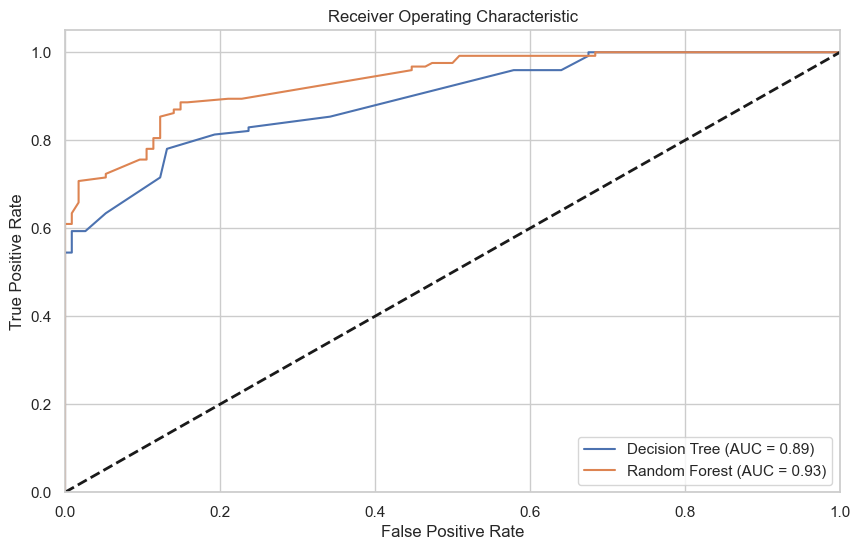

In [16]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define the models
models = [base_rate_model, dtree, random_forest_model]
model_names = ["Base Rate Model", "Decision Tree", "Random Forest"]

# Initialize an empty ROC curve plot
plt.figure(figsize=(10, 6))

# Iterate through the models and plot their ROC curves
for i, model in enumerate(models):
    if i == 0:
        # The base rate model has no probability estimates, so we skip it.
        continue

    # Get the predicted probabilities for class 1 (1.0) from the model
    y_prob = model.predict_proba(X_test)[:, 1]

    # Calculate the ROC curve
    fpr, tpr, _ = roc_curve(Y_test, y_prob)

    # Calculate the AUC (Area Under the Curve)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve for the model
    plt.plot(fpr, tpr, label=f'{model_names[i]} (AUC = {roc_auc:.2f})')

# Add labels and legends to the plot
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Display the ROC curve graph
plt.show()

### Comment on the ROC graph

The curves tell the story of how they balance true positives and false positives, providing insights into their classification abilities. It has revealed that both the "Decision Tree" and "Random Forest" models are strong contenders in our classification task. The AUC scores of 0.89 and 0.93 respectively showcase their ability to effectively separate classes.

Specifically, the "Decision Tree" model has shown its mettle with an AUC (Area Under the Curve) score of 0.89. This score is a testament to its capability to effectively separate the "low" and "high" classes. When we examine its ROC curve, we can see a trajectory that highlights its accuracy in distinguishing between these classes.

In the mean time, the "Random Forest" model has delivered remarkable results, boasting an impressive AUC of 0.93. This high AUC score demonstrates the Random Forest's efficiency in classifying "low" and "high" categories. When we look at its ROC curve, we see a trajectory that showcases its strength in separating these classes with precision.

# Conclusion

In conclusion, this project aimed to provide recent graduates and jobseekers with a valuable tool for evaluating job opportunities and making informed career decisions. By analyzing job-related data scraped from "jobsgo.vn" and building predictive models, we sought to assess and predict job evaluation values.

The project involved the creation and comparison of three predictive models: a Base Rate Model, a Decision Tree Model, and a Random Forest Model. These models were evaluated based on their ability to predict job evaluation values, including "Low" and "High."

The Random Forest Model outperformed the other models, attaining the greatest accuracy as well as greater precision and recall for all three classes, however there was considerable potential for improvement in predicting the "Medium" class. The Decision Tree Model also showed promise, while the Base Rate Model proved inadequate for this prediction task.

This project underscores the importance of leveraging data and machine learning techniques to gain insights into the complex job market. While the Random Forest Model offers a valuable tool for job evaluation, further refinement and feature engineering could enhance its predictive capabilities.

Ultimately, this project serves as a stepping stone for jobseekers, providing them with a data-driven approach to assessing job opportunities and making informed decisions as they embark on their professional journeys.

# Furtherworks

#### Enhancing Model Performance and User Experience

While the current project has provided valuable insights and predictive models, there are several avenues for further exploration and improvement that can enhance both the accuracy of the models and the overall user experience. The following are key areas for future development:

1. Dataset Improvement for Enhanced Model Accuracy:

- One of the primary directions for improvement is expanding and enhancing the dataset used for training and testing the models. Collecting a more extensive and diverse dataset can lead to more accurate and robust models. It is essential to ensure that the data is up-to-date and representative of the real-world scenario. Collaboration with relevant industry partners or organizations to obtain high-quality data can be explored.

2. Feature Engineering and Model Optimization:

- Further exploration of feature engineering techniques and model optimization can lead to better model performance. Techniques like feature selection, dimensionality reduction, and hyperparameter tuning can be employed to fine-tune the existing models. Continuous model refinement can significantly impact their predictive accuracy.

3. User-Friendly Predict Function:

- The current project can benefit from the development of a user-friendly prediction function. This function would allow users to input their data and receive personalized predictions based on the trained models.

4. Real-Time Data Integration and Job Suggestions:

- Leveraging real-time data through web scraping, as demonstrated in a previous project, can provide timely insights into the job market. By continuously collecting and analyzing data from job listings and trends, it is possible to offer users job suggestions that have better evaluation values. The real-time aspect would ensure that the job recommendations stay current and align with the evolving job landscape.